In [27]:
from sklearn.linear_model import LinearRegression
from typing import Any, Union
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import string
from IPython.display import display
import pyMechkar as mechkar
from scipy import stats
from random import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.metrics import accuracy_score

In [28]:
#desired_width=520
#pd.set_option('display.width', desired_width)
#np.set_printoptions(linewidth=desired_width)
#pd.set_option('display.max_columns',18)

In [29]:
Data = pd.read_csv("3products.csv", header=0)
#pd.options.display.max_columns = 13
#display(Data)
print(Data.head())

   Customer_ID  Weeknum        Product  Customer_Number  Sum_Quantity  \
0       0.0048       11  7290000408354        416000001             0   
1       0.0048       12  7290000408354        416000001            12   
2       0.0048       13  7290000408354        416000001             0   
3       0.0048       14  7290000408354        416000001            28   
4       0.0048       15  7290000408354        416000001            16   

   Avg_Price_Change  Avg_Price_Change_1  Sum_Quantity_1_minus_Sum_Quantity  \
0              2.97                2.97                                 12   
1              2.97                2.97                                -12   
2              2.97                2.97                                 28   
3              2.97                2.97                                  4   
4              2.97                2.97                                 12   

   Avg_Quantity_for_Week  Avg_Quantity_for_PO        ...         \
0                   9.13 

In [30]:
Data.describe()

,Customer_ID,Weeknum,Product,Customer_Number,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,...,Above_Standard_Price,Below_Standard_Price,Total_Quantity_for_Customer,Total_Quantity,Holiday,Temp_Hi,Temp_Lo,Temp_Rain,Frequency_PO,Sum_Quantity_1_Y
count,8273.000000,8273.000000,8.273000e+03,8.273000e+03,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,...,8273.000000,8273.000000,8273.000000,8273.0,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000
mean,0.007823,22.648495,7.290002e+12,4.160040e+08,12.488336,6.842739,6.837205,6.151577,12.627869,15.263525,...,0.000242,0.254563,99842.453282,12757437.0,0.380757,29.456382,20.040673,0.085700,1.314511,12.669407
std,0.003761,6.914421,1.230885e+06,2.669047e+04,14.654694,5.016903,5.019008,22.788421,9.589102,10.152253,...,0.015547,0.435642,47985.983455,0.0,0.485602,3.426201,4.209487,0.279938,0.403279,14.405577
min,0.000000,11.000000,7.290000e+12,4.160000e+08,0.000000,2.750000,2.380000,-216.000000,0.350000,1.000000,...,0.000000,0.000000,401.000000,12757437.0,0.000000,21.570000,11.290000,0.000000,0.860000,0.000000
25%,0.005000,17.000000,7.290000e+12,4.160001e+08,2.000000,2.970000,2.970000,-3.000000,5.960000,7.810000,...,0.000000,0.000000,63645.000000,12757437.0,0.000000,26.860000,17.570000,0.000000,1.100000,3.000000
50%,0.007500,23.000000,7.290003e+12,4.160001e+08,10.000000,3.570000,3.570000,1.000000,10.170000,13.810000,...,0.000000,0.000000,95217.000000,12757437.0,0.000000,31.430000,21.290000,0.000000,1.210000,12.000000
75%,0.009800,29.000000,7.290003e+12,4.160002e+08,16.000000,13.820000,13.820000,12.000000,16.170000,19.570000,...,0.000000,1.000000,124461.000000,12757437.0,1.000000,32.000000,24.140000,0.000000,1.440000,16.000000
max,0.020600,34.000000,7.290003e+12,4.162001e+08,312.000000,13.820000,13.820000,240.000000,59.430000,59.430000,...,1.000000,1.000000,263223.000000,12757437.0,1.000000,34.000000,25.140000,1.000000,5.750000,216.000000


In [21]:
Data.dtypes

Customer_ID                          float64
Weeknum                                int64
Product                                int64
Customer_Number                        int64
Sum_Quantity                           int64
Avg_Price_Change                     float64
Avg_Price_Change_1                   float64
Sum_Quantity_1_minus_Sum_Quantity      int64
Avg_Quantity_for_Week                float64
Avg_Quantity_for_PO                  float64
All_week                               int64
Count_week_PO                          int64
Standard_Price                       float64
Above_Standard_Price                   int64
Below_Standard_Price                   int64
Total_Quantity_for_Customer            int64
Total_Quantity                         int64
Holiday                                int64
Temp_Hi                              float64
Temp_Lo                              float64
Temp_Rain                              int64
Frequency_PO                         float64
Sum_Quanti

In [22]:
Data.dtypes[Data.dtypes=='float64']

Customer_ID              float64
Avg_Price_Change         float64
Avg_Price_Change_1       float64
Avg_Quantity_for_Week    float64
Avg_Quantity_for_PO      float64
Standard_Price           float64
Temp_Hi                  float64
Temp_Lo                  float64
Frequency_PO             float64
dtype: object

In [23]:
## determine the number of missing values
Data.isna().sum()

Customer_ID                          0
Weeknum                              0
Product                              0
Customer_Number                      0
Sum_Quantity                         0
Avg_Price_Change                     0
Avg_Price_Change_1                   0
Sum_Quantity_1_minus_Sum_Quantity    0
Avg_Quantity_for_Week                0
Avg_Quantity_for_PO                  0
All_week                             0
Count_week_PO                        0
Standard_Price                       0
Above_Standard_Price                 0
Below_Standard_Price                 0
Total_Quantity_for_Customer          0
Total_Quantity                       0
Holiday                              0
Temp_Hi                              0
Temp_Lo                              0
Temp_Rain                            0
Frequency_PO                         0
Sum_Quantity_1_Y                     0
dtype: int64

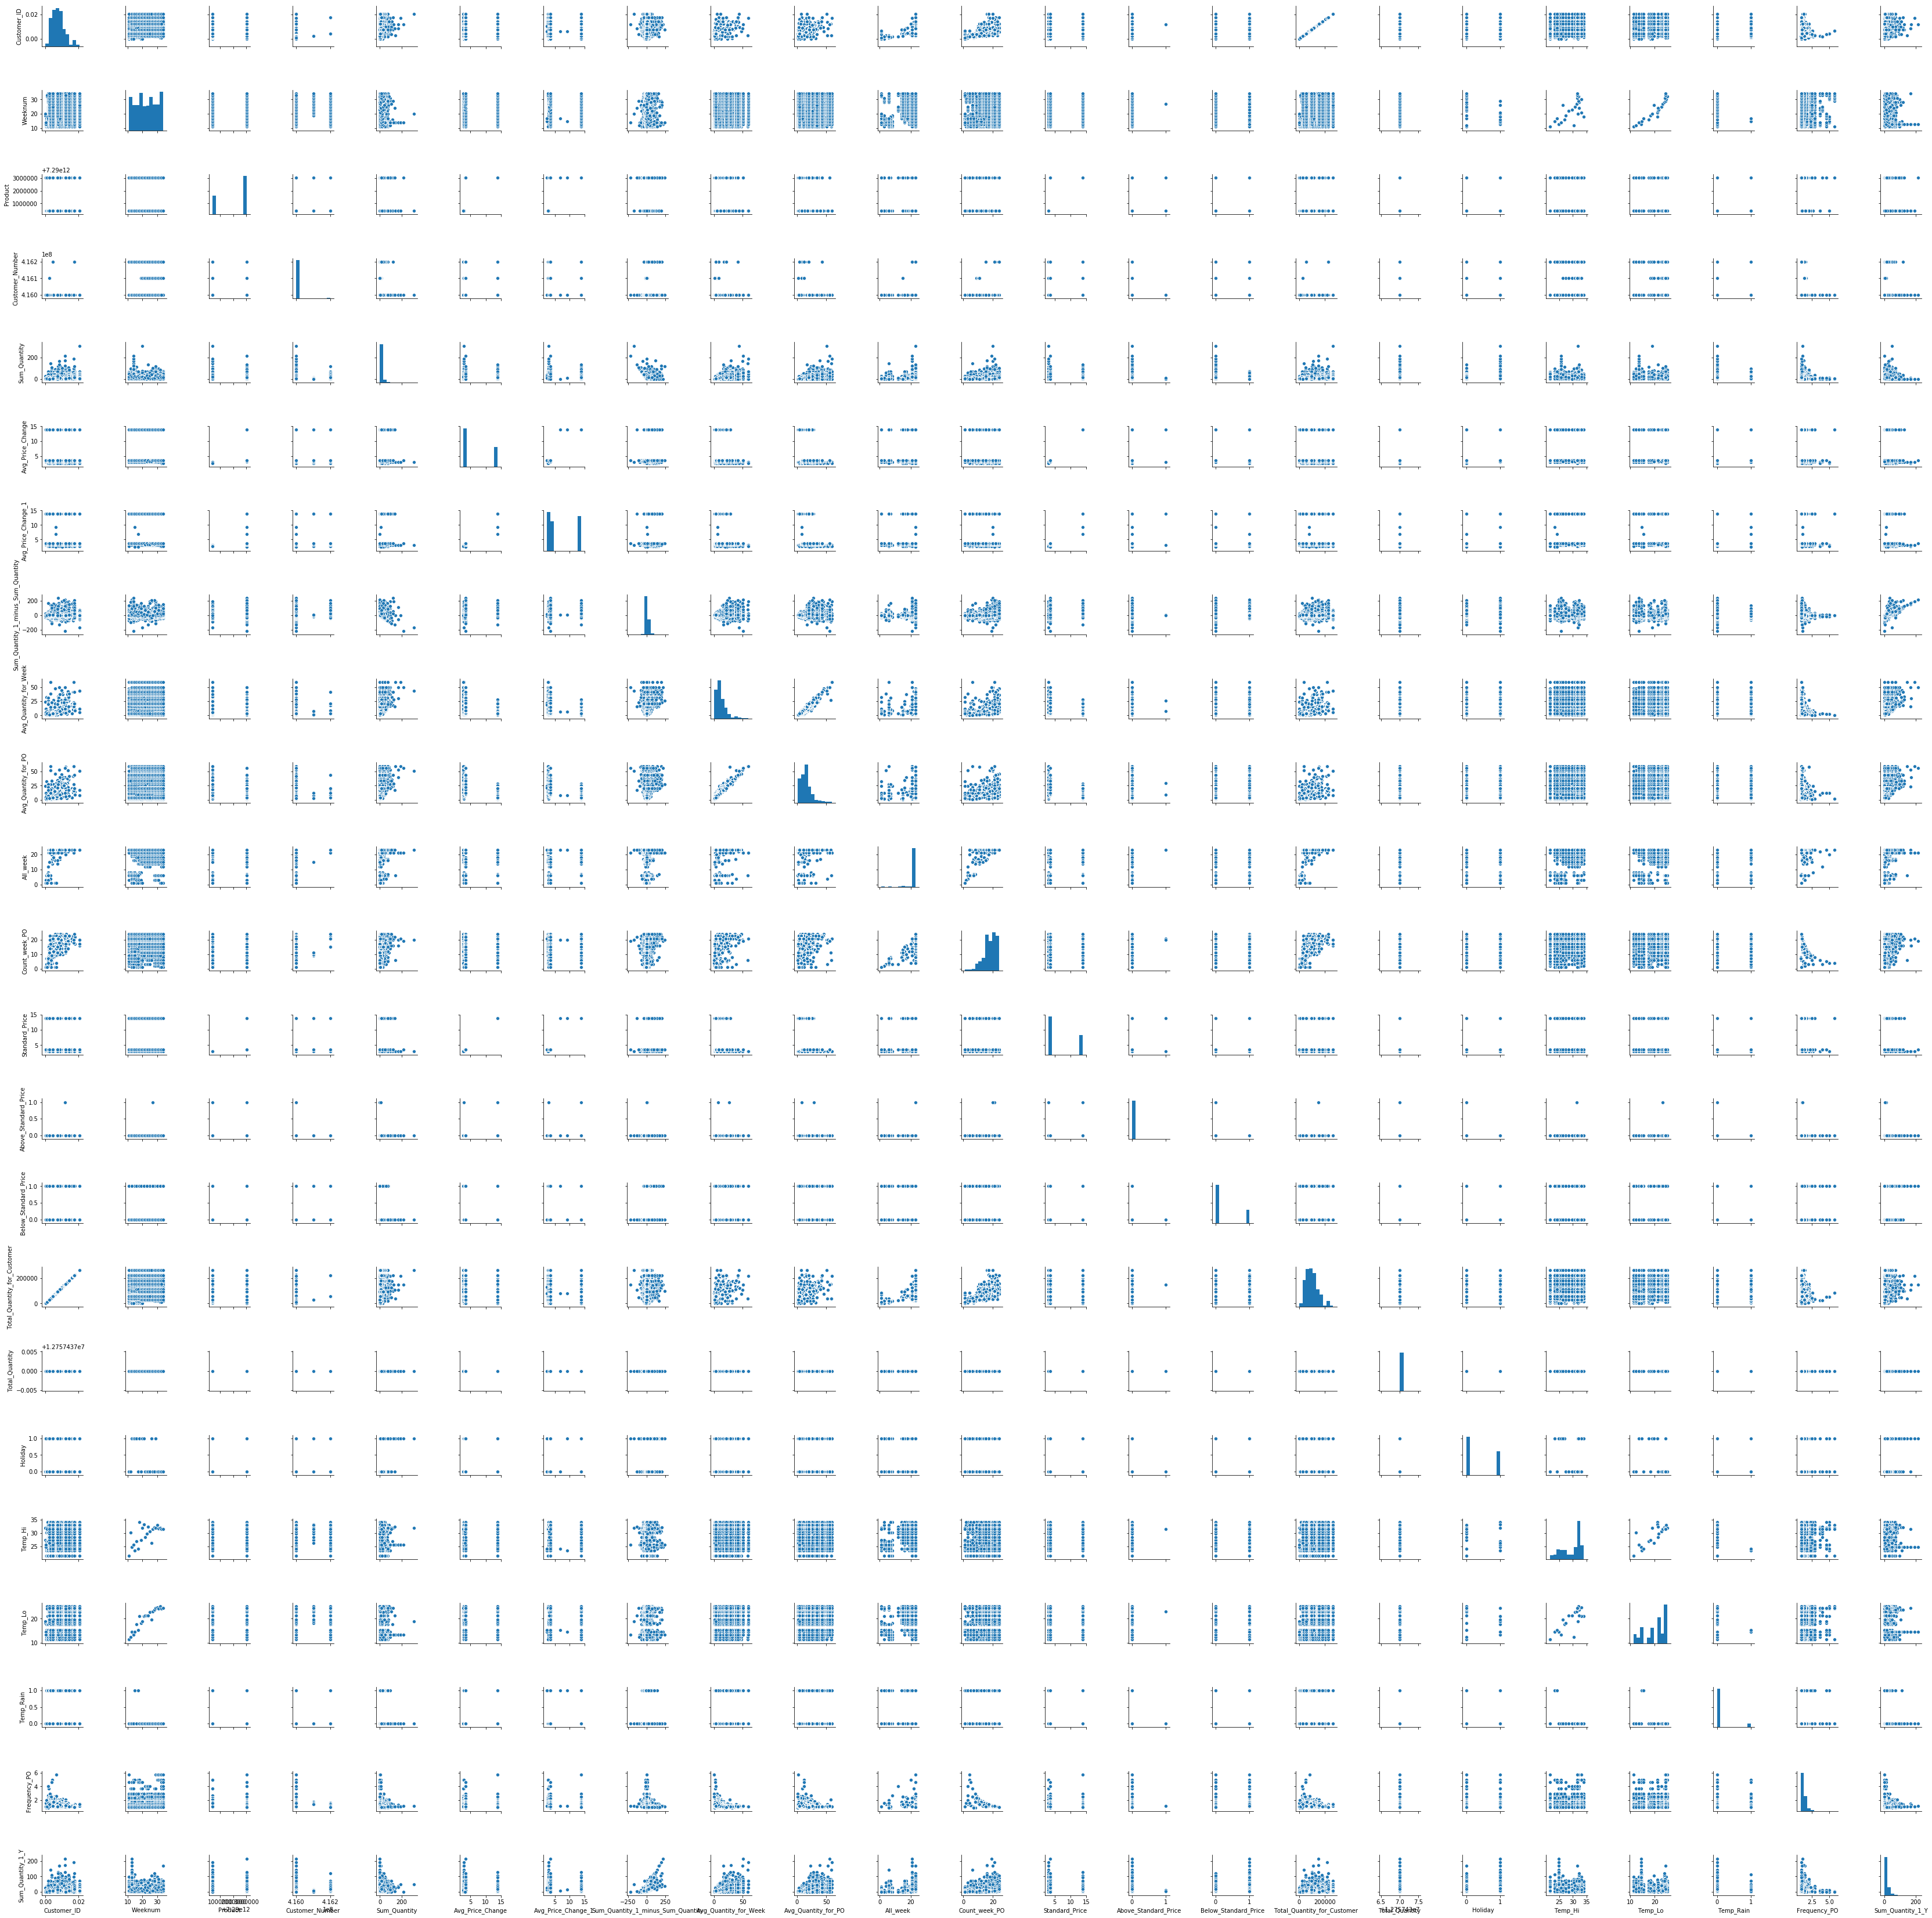

In [24]:
## Ploting bivariate relationtips. This graph will show the scatterplot for each combination and at 
## the diagonal will show the histogram of the variable. This graph helps to detect correlations and 
## outliers
sns.pairplot(Data, height=2)
plt.show()

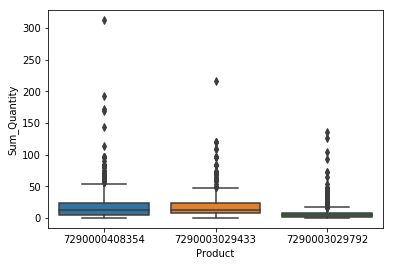

In [26]:
sns.boxplot(x=Data['Product'], y=Data['Sum_Quantity'])
plt.show()

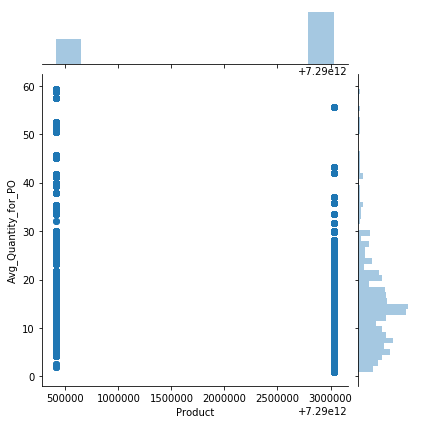

In [31]:
sns.jointplot(x=Data['Product'], y=Data['Avg_Quantity_for_PO'])
plt.show()

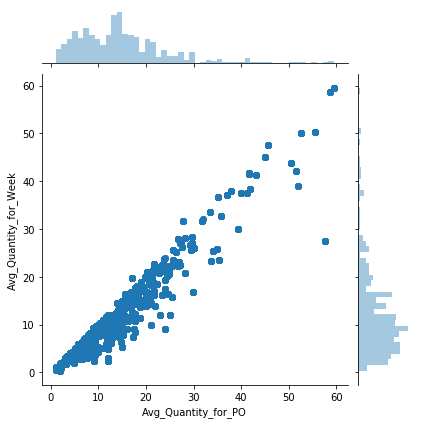

In [32]:
sns.jointplot(x=Data['Avg_Quantity_for_PO'], y=Data['Avg_Quantity_for_Week'])
plt.show()

In [33]:
Data2 = Data.copy()

In [34]:
Data2['Product'] = Data2['Product'].astype('category')


In [35]:
Data2['Customer_Number'] = Data2['Customer_Number'].astype('category')

In [36]:
Data2.dtypes

Customer_ID                           float64
Weeknum                                 int64
Product                              category
Customer_Number                      category
Sum_Quantity                            int64
Avg_Price_Change                      float64
Avg_Price_Change_1                    float64
Sum_Quantity_1_minus_Sum_Quantity       int64
Avg_Quantity_for_Week                 float64
Avg_Quantity_for_PO                   float64
All_week                                int64
Count_week_PO                           int64
Standard_Price                        float64
Above_Standard_Price                    int64
Below_Standard_Price                    int64
Total_Quantity_for_Customer             int64
Total_Quantity                          int64
Holiday                                 int64
Temp_Hi                               float64
Temp_Lo                               float64
Temp_Rain                               int64
Frequency_PO                      

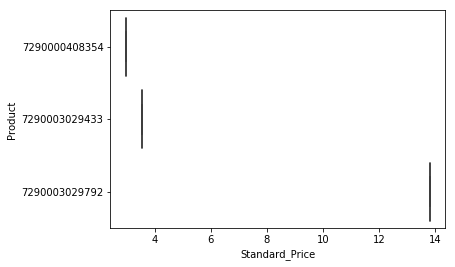

In [37]:
sns.boxplot(x=Data2['Standard_Price'], y=Data2['Product'])
plt.show()

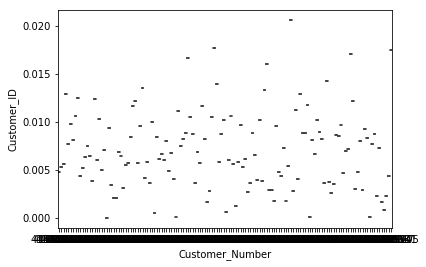

In [38]:
## Customet_ID alse reprosent the share of the customer, Customer number is the name of the customrt 
sns.boxplot(x=Data2['Customer_Number'], y=Data2['Customer_ID'])
plt.show()
# you can see that there are a few "big" customers, however the majority looks a like

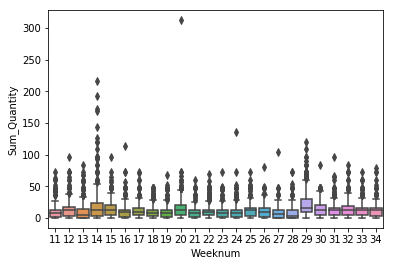

In [39]:
sns.boxplot(x=Data2['Weeknum'], y=Data2['Sum_Quantity'])
plt.show()

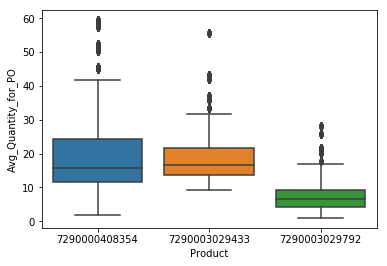

In [40]:
sns.boxplot(x=Data2['Product'], y=Data2['Avg_Quantity_for_PO'])
plt.show()

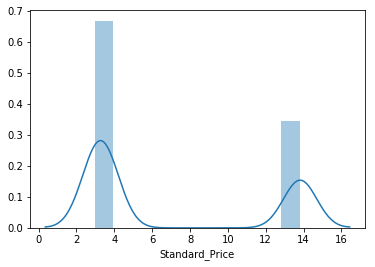

In [41]:
sns.distplot(Data['Standard_Price'])
plt.show()

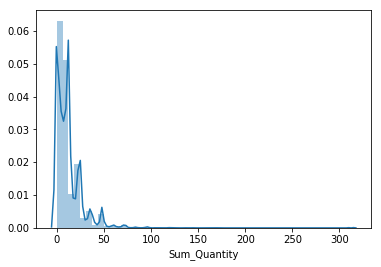

In [42]:
sns.distplot(Data['Sum_Quantity'])
plt.show()

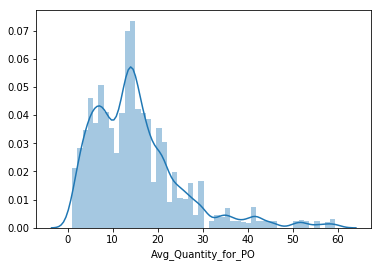

In [43]:
sns.distplot(Data['Avg_Quantity_for_PO'])
plt.show()

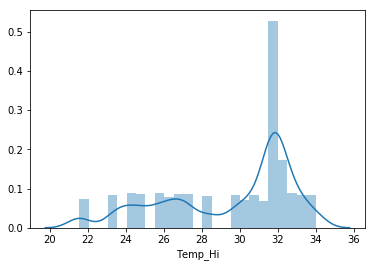

In [44]:
sns.distplot(Data['Temp_Hi'])
plt.show()

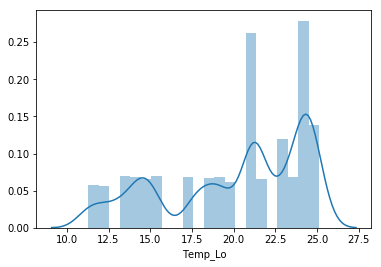

In [45]:
sns.distplot(Data['Temp_Lo'])
plt.show()

In [46]:
## it was a try to minimize the DB in order to get a P value for Y (Sum_Quantity_1_Y), however our Y is not a category 

##Data3 = Data2.drop(columns=['Avg_Price_Change','Sum_Quantity_1_minus_Sum_Quantity','Avg_Quantity_for_Week' , 'All_week', 'Count_week_PO', 'Above_Standard_Price', 'Below_Standard_Price', 'Total_Quantity','Avg_Price_Change_1','Temp_Hi','Temp_Lo','Temp_Rain','Frequency_PO','Holiday' ])
##Data3.head

In [47]:
tab1=mechkar.pyMechkar().Table1(data=Data2, y='Customer_number' )
tab1

Factorizing... please wait
***********************
[]
------ Finished in 2.6892778873443604econds -----


,Del,Variables,Categories,n,Population
0,0,Individuals,n,1,8273
1,0,Customer_ID,Mean (SD),1,0.00 ( 0.00)
2,0,Customer_ID,Median (IQR),2,0.00 ( 0.00- 0.00)
3,1,Customer_ID,Missing (%),3,--
4,0,Weeknum,Mean (SD),1,22.60 ( 6.90)
5,0,Weeknum,Median (IQR),2,23.00 ( 17.00- 29.00)
6,1,Weeknum,Missing (%),3,--
7,0,Product,7290003029792,0,"2,715.00 ( 32.80%)"
8,0,Product,7290003029433,1,"2,743.00 ( 33.20%)"
9,0,Product,7290000408354,2,"2,815.00 ( 34.00%)"


C:\Python\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Python\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


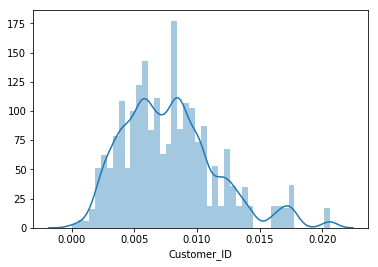

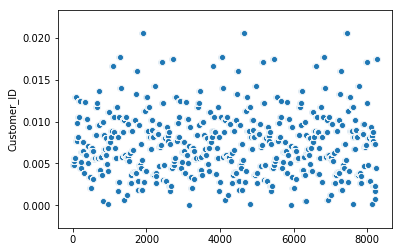

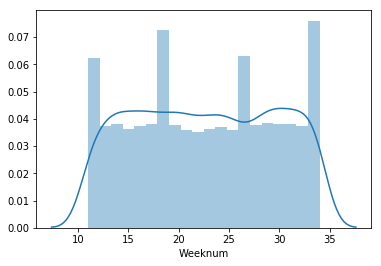

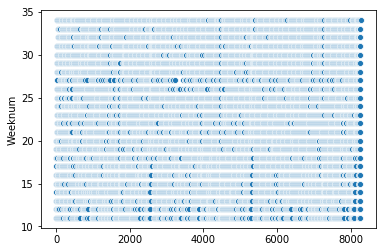

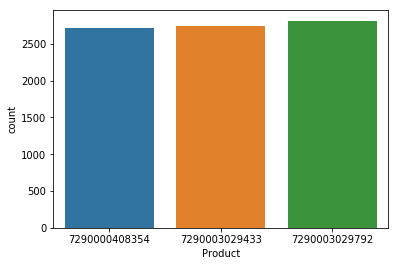

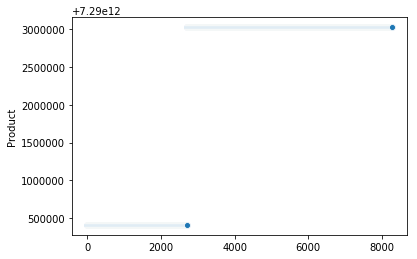

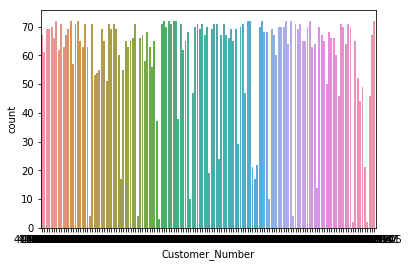

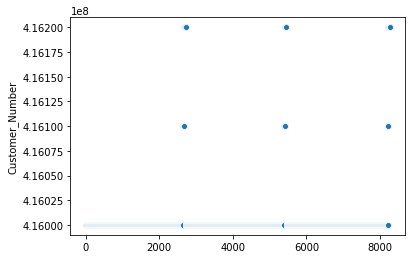

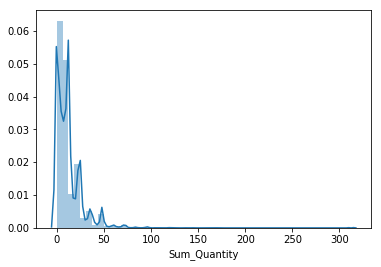

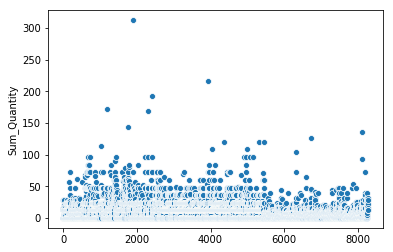

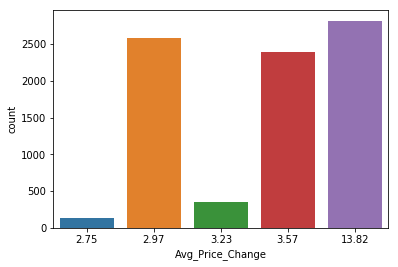

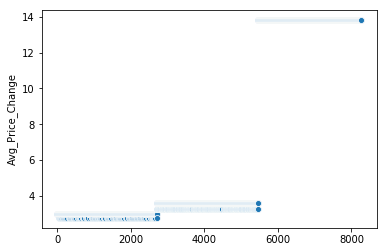

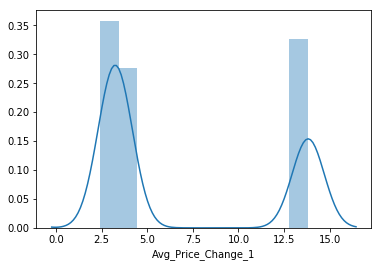

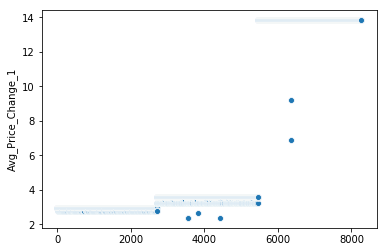

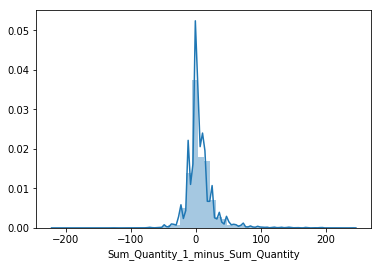

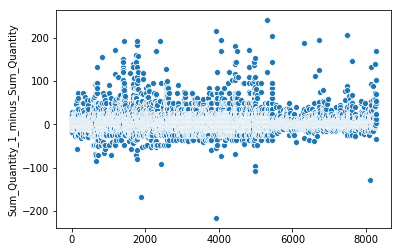

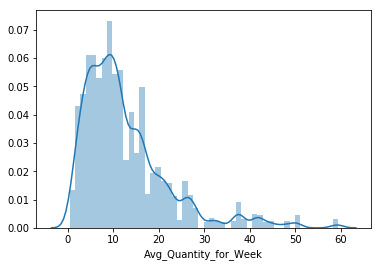

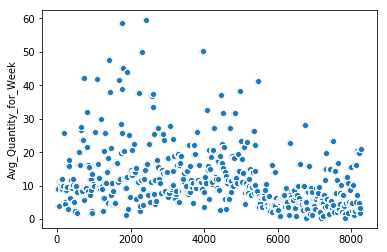

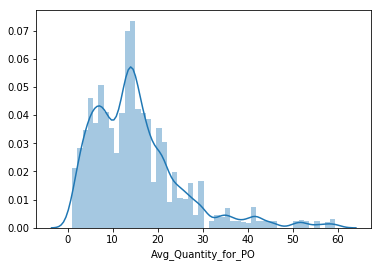

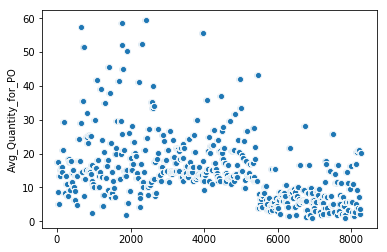

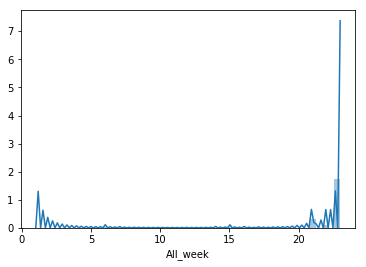

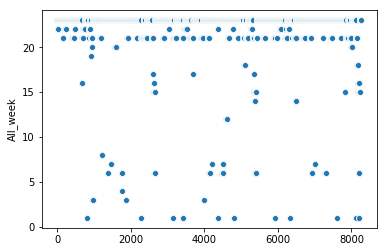

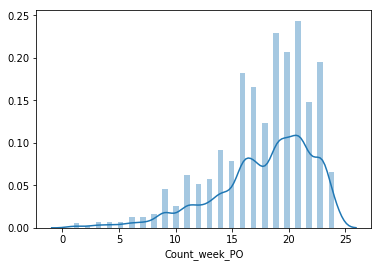

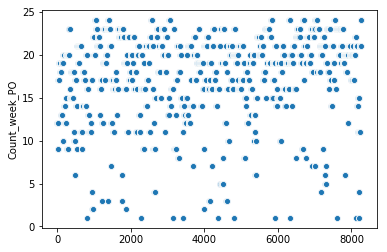

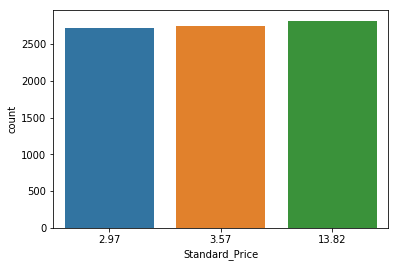

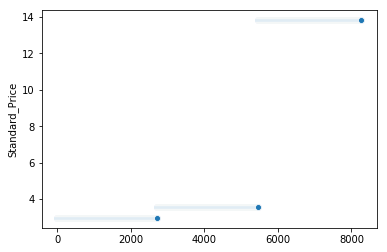

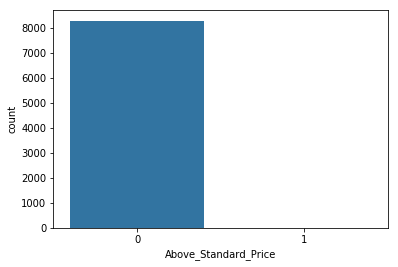

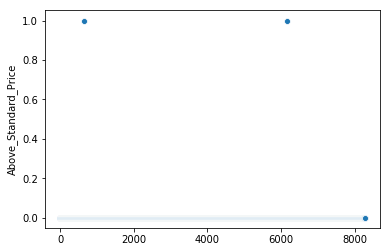

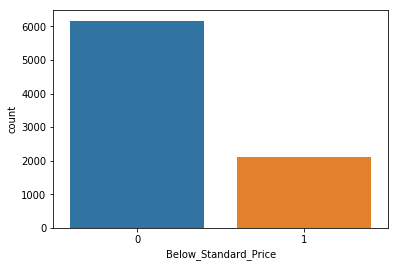

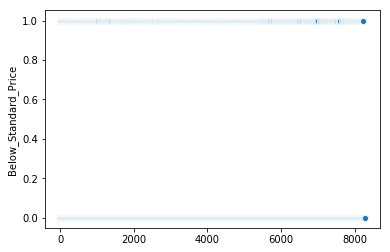

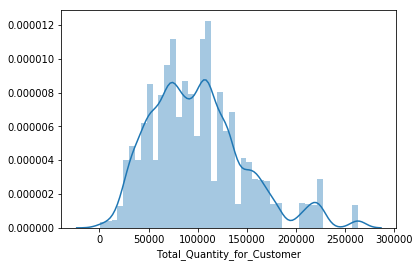

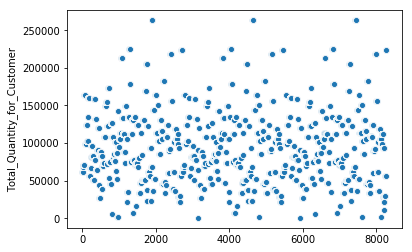

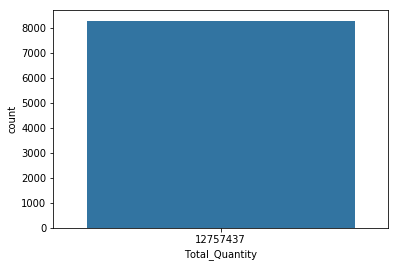

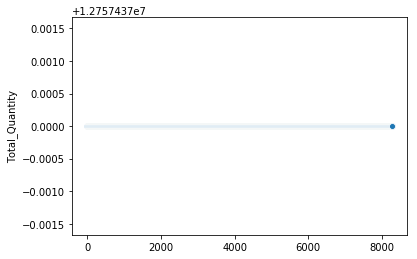

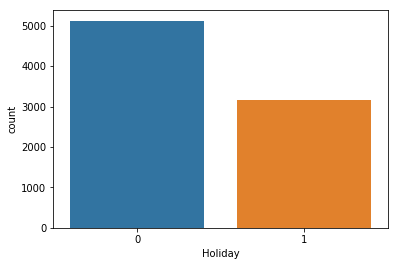

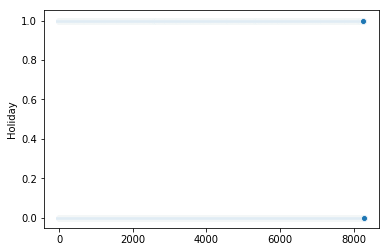

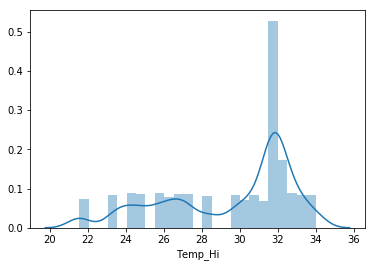

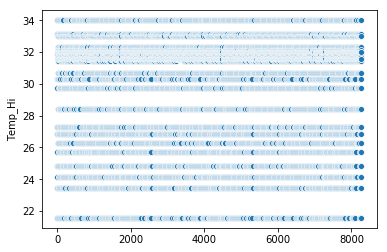

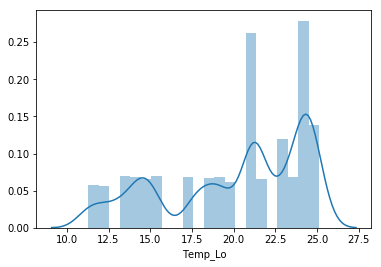

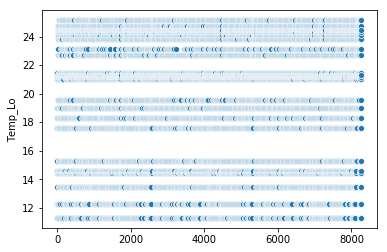

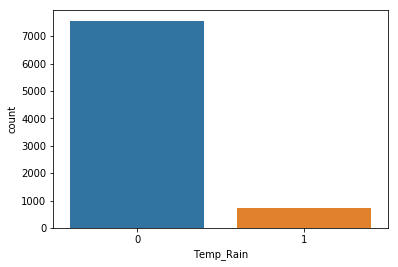

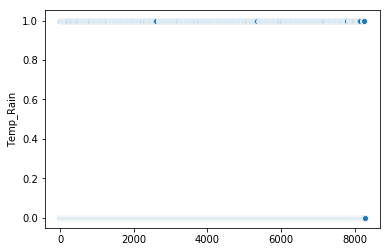

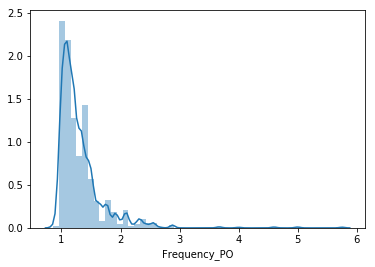

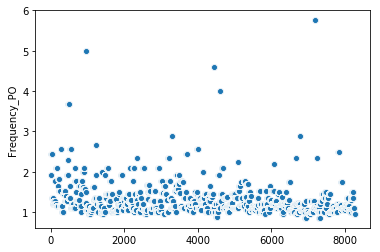

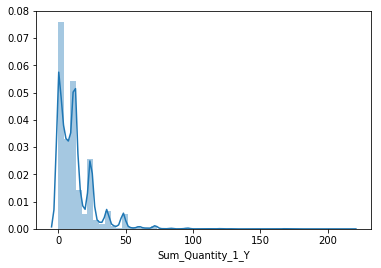

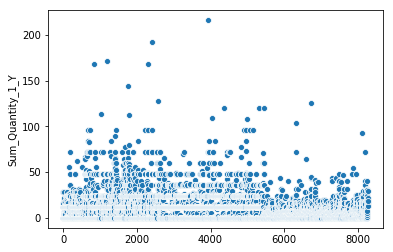

<Figure size 432x288 with 0 Axes>

In [49]:
mechkar.pyMechkar().exploreData(data=Data2)


In [50]:
print (Data2.groupby('Product').agg({'Sum_Quantity':['count',sum,'mean']}))

              Sum_Quantity                  
                     count    sum       mean
Product                                     
7290000408354         2715  43162  15.897606
7290003029433         2743  41181  15.013124
7290003029792         2815  18973   6.739964


In [52]:
## print (Data2)

In [53]:
## stop at "defining the error" @ Tree based models - Hyperparamaters

In [54]:
Data2ByProduct = Data2.sort_values(by=['Product', 'Weeknum'])
print(Data2ByProduct)

      Customer_ID  Weeknum        Product Customer_Number  Sum_Quantity  \
0          0.0048       11  7290000408354       416000001             0   
36         0.0056       11  7290000408354       416000005             4   
58         0.0129       11  7290000408354       416000006            12   
81         0.0077       11  7290000408354       416000007            12   
105        0.0098       11  7290000408354       416000008            12   
125        0.0081       11  7290000408354       416000009            12   
167        0.0125       11  7290000408354       416000011            24   
190        0.0044       11  7290000408354       416000014             8   
232        0.0064       11  7290000408354       416000016             0   
253        0.0075       11  7290000408354       416000018             4   
277        0.0065       11  7290000408354       416000019             0   
291        0.0039       11  7290000408354       416000021             4   
315        0.0124       1

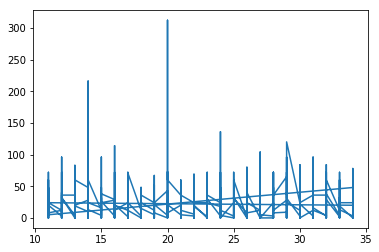

In [55]:
plt.plot (Data2ByProduct.Weeknum, Data2ByProduct.Sum_Quantity)

In [56]:
# we can see that in week 14 the quantities are very high, and on week 15 are very low, 

In [57]:
# extract a single product (7290003029792) and plot its quantities per week
P792 = Data2ByProduct.Product == 7290003029792
Prod792 = Data2ByProduct.copy()[P792]
Prod792.head()

,Customer_ID,Weeknum,Product,Customer_Number,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,...,Above_Standard_Price,Below_Standard_Price,Total_Quantity_for_Customer,Total_Quantity,Holiday,Temp_Hi,Temp_Lo,Temp_Rain,Frequency_PO,Sum_Quantity_1_Y
5458,0.0048,11,7290003029792,416000001,5,13.82,13.82,-2,3.70,3.86,...,0,0,60916,12757437,0,21.57,11.29,0,1.05,3
5481,0.0053,11,7290003029792,416000002,8,13.82,13.82,-4,6.96,8.00,...,0,0,67778,12757437,0,21.57,11.29,0,1.15,4
5505,0.0056,11,7290003029792,416000005,7,13.82,13.82,1,4.74,5.19,...,0,0,71258,12757437,0,21.57,11.29,0,1.10,4
5529,0.0129,11,7290003029792,416000006,3,13.82,13.82,1,6.43,6.73,...,0,0,164021,12757437,0,21.57,11.29,0,1.05,4
5553,0.0077,11,7290003029792,416000007,2,13.82,13.82,2,3.65,4.20,...,0,0,98187,12757437,0,21.57,11.29,0,1.15,4


Text(0.5,1,'7290003029792')

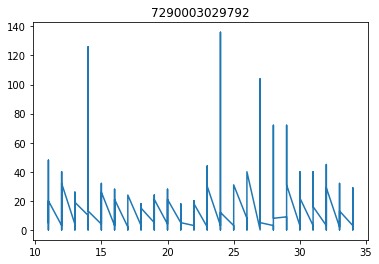

In [58]:
plt.plot (Prod792.Weeknum, Prod792.Sum_Quantity)
#plt.plot (Prod729.Weeknum, Prod729.Standard_Price)
#plt.plot (Prod17.Weeknum, Prod17.Holiday, label ='Holiday')
#eyal# it doesnt allow me to add Holidays even when in Int type 
plt.title ('7290003029792')

In [59]:
Prod792.describe()

,Customer_ID,Weeknum,Sum_Quantity,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,All_week,Count_week_PO,Total_Quantity_for_Customer,Temp_Hi,Temp_Lo,Frequency_PO,Sum_Quantity_1_Y
count,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000,2815.000000
mean,0.007803,22.706572,6.739964,13.815908,4.316874,6.928451,7.665297,22.093783,19.126465,99582.720071,29.474330,20.078114,1.204860,6.778686
std,0.003750,6.895855,8.226616,0.156536,14.547857,5.174193,5.056106,2.760857,4.006790,47847.774854,3.420708,4.196048,0.345288,7.790503
min,0.000000,11.000000,0.000000,6.910000,-128.000000,0.350000,1.000000,1.000000,1.000000,401.000000,21.570000,11.290000,0.860000,0.000000
25%,0.005000,17.000000,2.000000,13.820000,-1.000000,3.610000,4.225000,23.000000,18.000000,63645.000000,26.860000,17.570000,1.050000,2.000000
50%,0.007500,23.000000,5.000000,13.820000,1.000000,5.570000,6.450000,23.000000,20.000000,95217.000000,31.430000,21.290000,1.150000,5.000000
75%,0.009800,29.000000,8.000000,13.820000,6.000000,8.570000,9.380000,23.000000,22.000000,124461.000000,32.000000,24.140000,1.280000,8.000000
max,0.020600,34.000000,136.000000,13.820000,206.000000,28.140000,28.140000,23.000000,24.000000,263223.000000,34.000000,25.140000,5.750000,126.000000


It can be seen that the quantities are subjected to the Holidays (@ week 15)

In [62]:
# For multivariate outlier detection we can use DBSCAN. 
#This algorithm search for aggregation of points that are combined and leave out of them the outlier points.
# X is an numpy array
X = Data.copy()

def dbscan_mvoutliers(X):
    from sklearn.cluster import DBSCAN
    from sklearn.preprocessing import StandardScaler
    # scale data first
    X = StandardScaler().fit_transform(X.values)

    db = DBSCAN(eps=0.5, min_samples=50).fit(X)
    labels = db.labels_

    plt.figure(figsize=(20,20))

    unique_labels = set(labels)
    colors = ['blue', 'red']

    for color,label in zip(colors, unique_labels):
        sample_mask = [True if l == label else False for l in labels]
        plt.plot(X[:,0][sample_mask], Data2[:, 1][sample_mask], 'o', color=color);
    plt.xlabel('x');
    plt.ylabel('y');
    return(db)

In [64]:
## NOTE: it doesnt work 'slice' error
## dbsc1 = dbscan_mvoutliers(Data)

## Find corelation and P-Values 

In [65]:
df = pd.DataFrame(Data, columns = ['Sum_Quantity','Sum_Quantity_1_Y'])
from scipy import stats 

pearson_coef, p_value = stats.pearsonr(df["Sum_Quantity"], df["Sum_Quantity_1_Y"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 


Pearson Correlation Coefficient:  0.24889682120497358 and a P-value of: 4.8710521605408384e-117


In [66]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [67]:
## Calculate the P Value of the different paramaters (The p-value roughly indicates the probability of an uncorrelated system therefore we are looking for thos)
calculate_pvalues(Data)

C:\Python\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Python\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


,Customer_ID,Weeknum,Product,Customer_Number,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,...,Above_Standard_Price,Below_Standard_Price,Total_Quantity_for_Customer,Total_Quantity,Holiday,Temp_Hi,Temp_Lo,Temp_Rain,Frequency_PO,Sum_Quantity_1_Y
Customer_ID,0,0.3788,0.5757,0,0,0.6975,0.6979,0,0,0,...,0.1448,0,0,1,0.9614,0.2896,0.1773,0.7723,0,0
Weeknum,0.3788,0,0.6314,0.6149,0.9948,0.701,0.7136,0.2598,0.3732,0.594,...,0.3734,0,0.3805,1,0,0,0,0,0.0049,0.8208
Product,0.5757,0.6314,0,0.9514,0,0,0,0.0006,0,0,...,0.6049,0.0473,0.5711,1,0.6558,0.7015,0.5891,0.8459,0,0
Customer_Number,0,0.6149,0.9514,0,0.0841,0.9846,0.987,0,0.0015,0.1274,...,0.8336,0.3196,0,1,0.6484,0.562,0.4783,0.5792,0.0019,0.0739
Sum_Quantity,0,0.9948,0,0.0841,0,0,0,0.193,0,0,...,0.4127,0,0,1,0,0.4296,0.1043,0.2439,0,0
Avg_Price_Change,0.6975,0.701,0,0.9846,0,0,0,0,0,0,...,0.6617,0,0.6943,1,0.9071,0.7801,0.6565,0.9275,0,0
Avg_Price_Change_1,0.6979,0.7136,0,0.987,0,0,0,0,0,0,...,0.6607,0,0.6947,1,0.7745,0.7962,0.69,0.8585,0,0
Sum_Quantity_1_minus_Sum_Quantity,0,0.2598,0.0006,0,0.193,0,0,0,0,0,...,0.9925,0,0,1,0.0579,0.2899,0.3026,0.0009,0,0
Avg_Quantity_for_Week,0,0.3732,0,0.0015,0,0,0,0,0,0,...,0.5253,0,0,1,0.4556,0.4328,0.493,0.3549,0,0
Avg_Quantity_for_PO,0,0.594,0,0.1274,0,0,0,0,0,0,...,0.6277,0.9865,0,1,0.4116,0.6751,0.7588,0.3479,0,0


In [68]:
show_p = calculate_pvalues(Data)

C:\Python\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Python\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


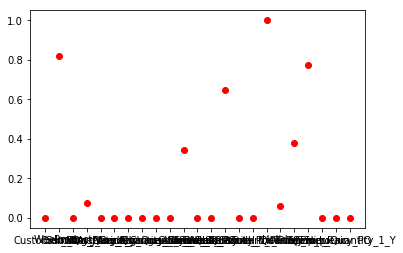

In [73]:
plt.plot(show_p['Sum_Quantity_1_Y'], 'ro')
plt.show()

In [70]:
## present the corelletion (+1 or -1 implying corelation where exeact -1 or 1 implaying linear corr; 0 implying NO corr)
df = pd.DataFrame(data=Data)
df.corr()

,Customer_ID,Weeknum,Product,Customer_Number,Sum_Quantity,Avg_Price_Change,Avg_Price_Change_1,Sum_Quantity_1_minus_Sum_Quantity,Avg_Quantity_for_Week,Avg_Quantity_for_PO,...,Above_Standard_Price,Below_Standard_Price,Total_Quantity_for_Customer,Total_Quantity,Holiday,Temp_Hi,Temp_Lo,Temp_Rain,Frequency_PO,Sum_Quantity_1_Y
Customer_ID,1.000000,0.009678,-0.006154,0.082093,0.265350,-0.004274,-0.004269,0.145339,0.423732,0.381364,...,0.016031,-0.103611,0.999972,NaN,-0.000532,0.011643,0.014834,-0.003182,-0.327188,0.268319
Weeknum,0.009678,1.000000,0.005275,0.005531,-0.000071,0.004222,0.004036,-0.012392,-0.009791,-0.005862,...,0.009787,0.059288,0.009642,NaN,-0.405795,0.667349,0.935458,-0.293216,0.030930,-0.002491
Product,-0.006154,0.005275,1.000000,-0.000670,-0.162634,0.541178,0.541525,-0.037777,-0.247029,-0.303659,...,-0.005689,-0.021805,-0.006229,NaN,-0.004901,0.004215,0.005940,-0.002137,-0.125327,-0.169654
Customer_Number,0.082093,0.005531,-0.000670,1.000000,0.018994,-0.000212,-0.000180,0.056372,0.034862,0.016760,...,-0.002310,-0.010945,0.081670,NaN,-0.005014,0.006376,0.007796,-0.006099,-0.034125,0.019650
Sum_Quantity,0.265350,-0.000071,-0.162634,0.018994,1.000000,-0.282942,-0.281831,-0.014313,0.616769,0.604167,...,-0.009008,-0.341099,0.265445,NaN,0.089792,-0.008685,-0.017860,0.012812,-0.180946,0.248897
Avg_Price_Change,-0.004274,0.004222,0.541178,-0.000212,-0.282942,1.000000,0.999712,-0.057049,-0.428360,-0.538847,...,0.004812,-0.171003,-0.004322,NaN,0.001284,0.003069,0.004890,-0.001000,-0.196164,-0.293634
Avg_Price_Change_1,-0.004269,0.004036,0.541525,-0.000180,-0.281831,0.999712,1.000000,-0.058864,-0.428378,-0.538827,...,0.004827,-0.169989,-0.004316,NaN,0.003150,0.002840,0.004386,-0.001961,-0.196068,-0.295357
Sum_Quantity_1_minus_Sum_Quantity,0.145339,-0.012392,-0.037777,0.056372,-0.014313,-0.057049,-0.058864,1.000000,0.329955,0.286067,...,-0.000103,0.171829,0.145465,NaN,-0.020849,-0.011637,-0.011336,-0.036431,-0.138047,0.761770
Avg_Quantity_for_Week,0.423732,-0.009791,-0.247029,0.034862,0.616769,-0.428360,-0.428378,0.329955,1.000000,0.958504,...,0.006985,-0.065632,0.423901,NaN,0.008205,-0.008624,-0.007539,0.010172,-0.341802,0.629018
Avg_Quantity_for_PO,0.381364,-0.005862,-0.303659,0.016760,0.604167,-0.538847,-0.538827,0.286067,0.958504,1.000000,...,0.005333,0.000186,0.381459,NaN,0.009028,-0.004610,-0.003377,0.010321,-0.160056,0.617173


In [71]:
show_corr = df.corr()

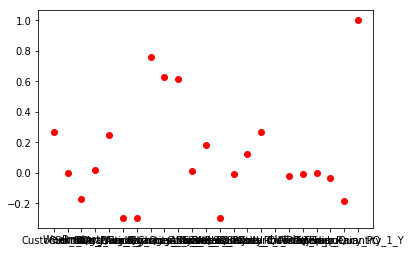

In [72]:
plt.plot(show_corr['Sum_Quantity_1_Y'], 'ro')
plt.show()

In [74]:
y = Data.values[:, -1]
x = Data.values[:, 2:-1]

In [75]:
indexes = [x for x in range(len(y))]
shuffle(indexes)
border = int(0.10 * len(indexes))
test_indx = indexes[: border]
train_indx = indexes[border :]

In [76]:
x_train = x[train_indx]
x_test = x[test_indx]
y_train = y[train_indx]
y_test = y[test_indx]
Data.dtypes

Customer_ID                          float64
Weeknum                                int64
Product                                int64
Customer_Number                        int64
Sum_Quantity                           int64
Avg_Price_Change                     float64
Avg_Price_Change_1                   float64
Sum_Quantity_1_minus_Sum_Quantity      int64
Avg_Quantity_for_Week                float64
Avg_Quantity_for_PO                  float64
All_week                               int64
Count_week_PO                          int64
Standard_Price                       float64
Above_Standard_Price                   int64
Below_Standard_Price                   int64
Total_Quantity_for_Customer            int64
Total_Quantity                         int64
Holiday                                int64
Temp_Hi                              float64
Temp_Lo                              float64
Temp_Rain                              int64
Frequency_PO                         float64
Sum_Quanti

In [77]:
# Train number of line (90%)
len (x_train)

7446

In [78]:
#test number of lines (10%)
len (x_test)

827

In [79]:
mod_linear = LinearRegression(n_jobs=-1)
mod_linear.fit(x_train, y_train)
pred_linear = mod_linear.predict(x_test)
pred_linear = np.round(pred_linear)
## pred_linear_cvs = mod_linear.predict(csvTest) ## write to file
acc_linear=accuracy_score(y_test, pred_linear, normalize=False)
print("acc linear", acc_linear)
mae_linear = mean_absolute_error(y_test, pred_linear)
print("MAE linear", mae_linear)

acc linear 109
MAE linear 3.852478839177751


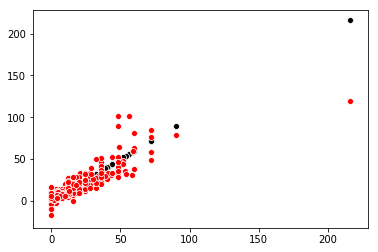

In [80]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_linear, color="red")
plt.show()

In [81]:
mod_svm = svm.SVC (kernel='sigmoid',gamma=3 ,probability=False, random_state=0)
y_pred_svm = mod_svm.fit(x_train,y_train)
pred_svm = mod_svm.predict(x_test)
## pred_svm_cvs = mod_svm.predict(csvTest) ## write to file
acc_svm=accuracy_score(y_test,pred_svm, normalize=False)
print("acc svm", acc_svm)
mae_svm = mean_absolute_error(y_test, pred_svm)
print("MAE svm",mae_svm)

acc svm 180
MAE svm 9.141475211608222


In [82]:
## using sigmoid 
## Acc 180 outof 827
## MAE 9.14

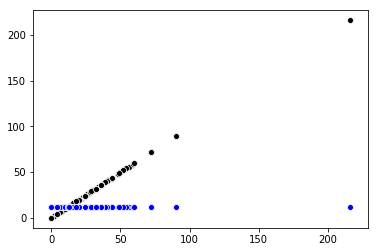

In [83]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_svm, color="blue")
plt.show()

In [97]:
from sklearn.ensemble import AdaBoostClassifier
mod_rforest = AdaBoostClassifier(random_state=2, algorithm='SAMME.R', n_estimators=50)
y_pred_AdaBoost = mod_rforest.fit(x_train,y_train)
pred_AdaBoost = mod_rforest.predict(x_test)
#pred_adaBoost_cvs = mod_rforest.predict(csvTest) 
acc_adaBoost = accuracy_score(y_test,pred_AdaBoost, normalize=False)
print("acc AdaBoost", acc_adaBoost)
mea_adaBoost = mean_absolute_error(y_test,pred_AdaBoost)
print("mea AdaBoost", mea_adaBoost)

acc AdaBoost 328
mea AdaBoost 5.633615477629988


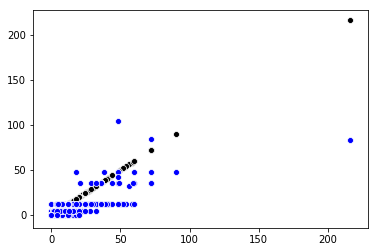

In [86]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_AdaBoost, color="blue")
plt.show()

In [87]:
from sklearn.naive_bayes import GaussianNB
mod_bayes = GaussianNB()
y_pred_naive = mod_bayes.fit(x_train,y_train)
pred_naive = mod_bayes.predict(x_test)
acc_naive=accuracy_score(y_test, pred_naive, normalize=True)
print("acc naive", acc_naive)
mae_naive = mean_absolute_error(y_test, pred_naive)
print("MAE naive", mae_naive)

acc naive 0.016928657799274487
MAE naive 25.11850060459492


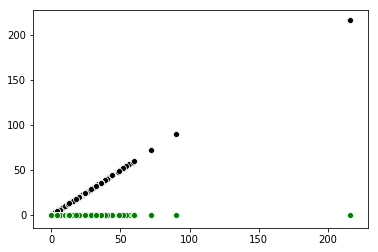

In [88]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=acc_naive, color="green")
plt.show()

In [89]:
from sklearn.linear_model import LogisticRegression
mod_logistic = LogisticRegression()
mod_logistic.fit(x_train,y_train)
pred_logistic = mod_logistic.predict(x_test)
acc_logistic=accuracy_score(y_test, pred_logistic, normalize=False)
print("acc logistic", acc_logistic)
mae_logistic = mean_absolute_error(y_test, pred_logistic)
print("MAE logistic", mae_logistic)

acc logistic 180
MAE logistic 9.141475211608222


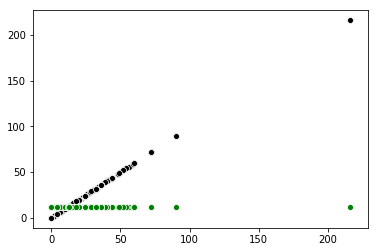

In [90]:
sns.scatterplot(x=y_test, y=y_test, color="black")
sns.scatterplot(x=y_test, y=pred_logistic, color="green")
plt.show()

## Initiate a new database of high corelation columns 

In [91]:
## it was a try to minimize the DB in order to get a P value for Y (Sum_Quantity_1_Y), however our Y is not a category 
DropData = Data.drop(columns=['Avg_Quantity_for_Week','Below_Standard_Price','Total_Quantity','Holiday','Temp_Hi','Temp_Lo','Temp_Rain'])


In [92]:
print(DropData)

      Customer_ID  Weeknum        Product  Customer_Number  Sum_Quantity  \
0          0.0048       11  7290000408354        416000001             0   
1          0.0048       12  7290000408354        416000001            12   
2          0.0048       13  7290000408354        416000001             0   
3          0.0048       14  7290000408354        416000001            28   
4          0.0048       15  7290000408354        416000001            16   
5          0.0048       16  7290000408354        416000001            28   
6          0.0048       17  7290000408354        416000001            12   
7          0.0048       18  7290000408354        416000001             0   
8          0.0048       19  7290000408354        416000001            12   
9          0.0048       20  7290000408354        416000001             0   
10         0.0048       21  7290000408354        416000001            20   
11         0.0048       23  7290000408354        416000001             0   
12         0

In [93]:
DropData.dtypes

Customer_ID                          float64
Weeknum                                int64
Product                                int64
Customer_Number                        int64
Sum_Quantity                           int64
Avg_Price_Change                     float64
Avg_Price_Change_1                   float64
Sum_Quantity_1_minus_Sum_Quantity      int64
Avg_Quantity_for_PO                  float64
All_week                               int64
Count_week_PO                          int64
Standard_Price                       float64
Above_Standard_Price                   int64
Total_Quantity_for_Customer            int64
Frequency_PO                         float64
Sum_Quantity_1_Y                       int64
dtype: object

In [133]:
y2 = DropData.values[:, -1]
x2 = DropData.values[:, 2:-1]

In [134]:
indexes = [x2 for x2 in range(len(y))]
shuffle(indexes)
border = int(0.10 * len(indexes))
test_indx = indexes[: border]
train_indx = indexes[border :]

x2_train = x2[train_indx]
x2_test = x2[test_indx]
y2_train = y2[train_indx]
y2_test = y2[test_indx]

In [166]:
from sklearn.ensemble import AdaBoostClassifier
mod_rforest = AdaBoostClassifier(random_state=2, algorithm='SAMME.R', n_estimators=50)
y2_pred_AdaBoost = mod_rforest.fit(x2_train,y2_train)
pred_AdaBoost = mod_rforest.predict(x2_test)
#pred_adaBoost_cvs = mod_rforest.predict(csvTest) 
acc_adaBoost = accuracy_score(y2_test,pred_AdaBoost, normalize=True)
print("acc AdaBoost", acc_adaBoost)
mea_adaBoost = mean_absolute_error(y2_test,pred_AdaBoost)
print("mea AdaBoost", mea_adaBoost)

acc AdaBoost 0.3966142684401451
mea AdaBoost 6.776299879081016


In [ ]:
## 429 outof 1106

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold

X = Data.values[:, 0:-1]
y = Data.values[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

mod_rforest = AdaBoostClassifier(random_state=2, algorithm='SAMME.R', n_estimators=50)
scores = cross_val_score(mod_rforest, X, y, cv=50, scoring='accuracy')
    
print(scores)

C:\Python\Anaconda3\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=50.
  % (min_labels, self.n_folds)), Warning)
